# Pandas 高级教程

## 1.Pandas分组聚合

### 任务描述

使用Pandas加载drinks.csv文件中的数据，根据数据信息求每个大洲红酒消耗量的最大值与最小值的差以及啤酒消耗量的和。

### 相关知识

分组聚合的流程主要有三步：

- **分割步骤**：将DataFrame按照指定的键分割成若干组
- **应用步骤**：对每个组应用函数，通常是累计、转换或过滤函数
- **组合步骤**：将每一组的结果合并成一个输出数组

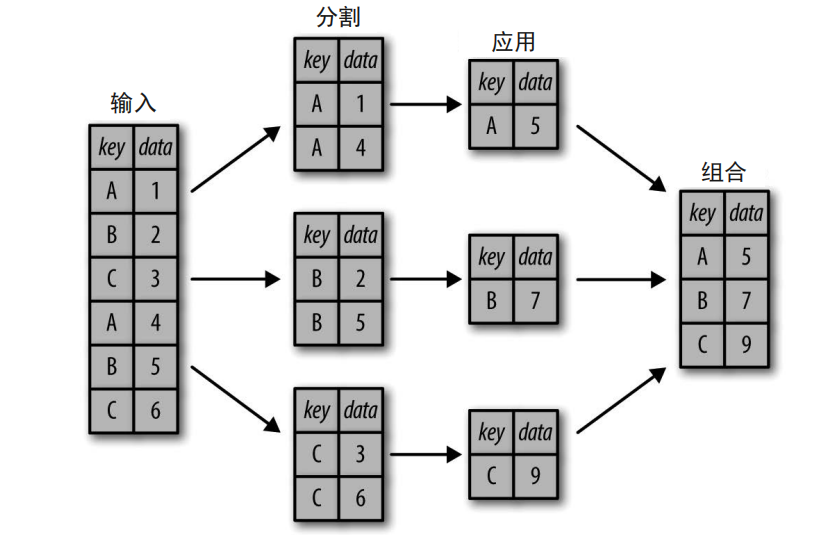

#### 分组

通常我们将数据分成多个集合的操作称之为分组，Pandas中使用groupby()函数来实现分组操作。

##### 单列和多列分组

对分组后的子集进行数值运算时，不是数值的列会自动过滤。

In [4]:
import pandas as pd

data = {
    'A': [1, 2, 2, 3, 2, 4],
    'B': [2014, 2015, 2014, 2014, 2015, 2017],
    'C': ["a", "b", "c", "d", "e", "f"],
    'D': [0.5, 0.9, 2.1, 1.5, 0.5, 0.1]
}
df = pd.DataFrame(data)
#单列分组,返回的是一个groupby对象
gbo = df.groupby("B") 
gbo

In [6]:
# 调用聚合函数
gbo.sum()

,A,D
B,,
2014,6,4.1
2015,4,1.4
2017,4,0.1


In [7]:
#多列分组,返回的是一个groupby对象
gbo = df.groupby(["B","C"])
gbo.sum()

A    D
B    C        
2014 a  1  0.5
     c  2  2.1
     d  3  1.5
2015 b  2  0.9
     e  2  0.5
2017 f  4  0.1

##### Series系列分组

选取数据帧中的一列作为index进行分组：

In [9]:
gbo = df["A"].groupby(df["B"])
gbo.sum()

B
2014    6
2015    4
2017    4
Name: A, dtype: int64

##### 通过数据类型或者字典分组

- 数据类型分组：

In [13]:
gbo = df.groupby(df.dtypes, axis=1)
gbo.sum()

,int64,float64,object
0,2015,0.5,a
1,2017,0.9,b
2,2016,2.1,c
3,2017,1.5,d
4,2017,0.5,e
5,2021,0.1,f


- 传入字典分组:

In [16]:
dic = {
    "A": "number", 
    "B": "number", 
    "C": "str", 
    "D": "number"
}
#按列分组，列名是字典的值
gbo = df.groupby(dic, axis=1)
gbo.count()

,number,str
0,3,1
1,3,1
2,3,1
3,3,1
4,3,1
5,3,1


##### 获取单个分组

使用get_group()方法可以选择一个组。

In [17]:
df.groupby("A").get_group(2)

,A,B,C,D
1,2,2015,b,0.9
2,2,2014,c,2.1
4,2,2015,e,0.5


##### 对分组进行迭代

GroupBy对象支持迭代，可以产生一组二元元组（由分组名和数据块组成）。

In [19]:
for name,data in df.groupby("A"):
    print('-' * 15, name, '-' * 15)
    print(data)

--------------- 1 ---------------
   A     B  C    D
0  1  2014  a  0.5
--------------- 2 ---------------
   A     B  C    D
1  2  2015  b  0.9
2  2  2014  c  2.1
4  2  2015  e  0.5
--------------- 3 ---------------
   A     B  C    D
3  3  2014  d  1.5
--------------- 4 ---------------
   A     B  C    D
5  4  2017  f  0.1


#### 聚合

聚合函数为每个组返回单个聚合值。当创建了groupby对象，就可以对分组数据执行多个聚合操作。比较常用的是通过聚合函数或等效的agg方法聚合。常用的聚合函数如下表：

| 函数名 | 说明 |
|:-- |:-- |
| count | 分组中非空值的数量 |
| sum | 非空值的和 |
| mean | 非空值的平均值 |
| median | 非空值的中位数 |
| std、var | 无偏标准差和方差 |
| min、max | 非空值的最小和最大值 |
| prod | 非空值的积 |
| first、last | 第一个和最后一个非空值 |

##### 应用单个聚合函数

对分组后的子集进行数值运算时，不是数值的列会自动过滤

In [22]:
import numpy as np

df.groupby("B").sum() 

,A,D
B,,
2014,6,4.1
2015,4,1.4
2017,4,0.1


##### 应用多个聚合函数

In [23]:
df.groupby("B").agg([np.sum, np.mean, np.std])

A              D                    
     sum mean  std  sum      mean       std
B                                          
2014   6    2  1.0  4.1  1.366667  0.808290
2015   4    2  0.0  1.4  0.700000  0.282843
2017   4    4  NaN  0.1  0.100000       NaN

##### 自定义函数传入agg()中

In [24]:
df.groupby("B").agg(lambda df: df.max() - df.min())

,A,D
B,,
2014,2,1.6
2015,0,0.4
2017,0,0.0


##### 对不同的列使用不同的聚合函数

In [25]:
mapping = {
    "A":np.sum,
    "B":np.mean
}
df.groupby("C").agg(mapping)

,A,B
C,,
a,1,2014
b,2,2015
c,2,2014
d,3,2014
e,2,2015
f,4,2017


### 实操练习

#### 编程要求

使用Pandas中的read_csv()函数读取sample_data/drinks.csv中的数据，数据的列名如下表所示。

| 列名 | 说明 |
|:-- |:-- |
| country | 国家名 |
| beer_servings | 啤酒消耗量 |
| spirit_servings | 白酒消耗量 |
| wine_servings | 红酒消耗量 |
| total_litres_of_pure_alcohol | 纯酒精总量 |
| continent | 大洲名 |

请根据continent分组并求每个大洲红酒消耗量的最大值与最小值的差以及啤酒消耗量的和。在下列代码的begin-end处补充代码。

#### 测试说明

测试输入：无

预期输出：
```
               wine_servings  beer_servings
continent
Africa                   233           3258
Asia                     123           1630
Europe                   370           8720
North America             99           3345
Oceania                  212           1435
South America            220           2101
```

In [32]:
import pandas as pd
import numpy as np

#返回最大值与最小值的差
def sub(df):
    ######## Begin #######
    return df.max() - df.min()
    ######## End #######

def main():
    ######## Begin #######
    df = pd.read_csv('sample_data/drinks.csv')
    
    res = df.groupby('continent').agg({
        'wine_servings': sub,
        'beer_servings': np.sum
    })
    
    print(res)
    ######## End #######

if __name__ == '__main__':
    main()

               wine_servings  beer_servings
continent                                  
Africa                   233           3258
Asia                     123           1630
Europe                   370           8720
North America             99           3345
Oceania                  212           1435
South America            220           2101


## 2.Pandas创建透视表和交叉表

### 任务描述

使用Pandas加载tip.csv文件中的数据集，分别用透视表和交叉表统计顾客在每种用餐时间、每个星期下的小费总和情况。

### 相关知识

#### 透视表

透视表是各种电子表格程序和其他数据分析软件中一种常见的数据汇总工具。它根据一个或多个键对数据进行聚合，并根据行和列上的分组建将数据分配到各个矩形区域中。在pandas中，可以通过pivot_table函数创建透视表。

pivot_talbe函数的参数：

- values：待聚合的列的名称。默认聚合所有数值列
- index：用于分组的列名或其他分组键，出现在结果透视表的行
- columns：用于分组的列名或其他分组键，出现在结果透视表的列
- aggfunc：聚合函数或函数列表，默认为mean，可以是任何对groupby有效的函数
- fill_value：用于替换结果表中的缺失值
- dropna：boolean值，默认为True
- margins_name：string，默认为‘ALL’，当参数margins为True时，ALL行和列的名字

示例：

In [33]:
data = {
    'A': [1, 2, 2, 3, 2, 4],
    'B': [2014, 2015, 2014, 2014, 2015, 2017],
    'C': ["a", "b", "c", "d", "e", "f"],
    'D': [0.5, 0.9, 2.1, 1.5, 0.5, 0.1]
}

df = pd.DataFrame(data)
df

,A,B,C,D
0,1,2014,a,0.5
1,2,2015,b,0.9
2,2,2014,c,2.1
3,3,2014,d,1.5
4,2,2015,e,0.5
5,4,2017,f,0.1


In [34]:
df.pivot_table(index=["B"], columns=["C"], values=["A"], aggfunc=sum, margins=True)

A                             
C       a    b    c    d    e    f All
B                                     
2014  1.0  NaN  2.0  3.0  NaN  NaN   6
2015  NaN  2.0  NaN  NaN  2.0  NaN   4
2017  NaN  NaN  NaN  NaN  NaN  4.0   4
All   1.0  2.0  2.0  3.0  2.0  4.0  14

#### 交叉表

交叉表是一种用于计算分组频率的特殊透视表。通常使用crosstab函数来创建交叉表。

##### crosstab的参数

`pd.crosstab(index,columns,values=None,rownames=None,colnames=None,aggfunc=None,margins=False,dropna=True,normalize=False)`

其中rownames可以设置行名，colnames可以设置列名，而且前两个参数可以是数组、Series或数组列表。

示例：

In [35]:
pd.crosstab(index=[df["B"],df["A"]], columns=df["C"], values=df["A"], aggfunc=sum, margins=True)

C         a    b    c    d    e    f  All
B    A                                   
2014 1  1.0  NaN  NaN  NaN  NaN  NaN    1
     2  NaN  NaN  2.0  NaN  NaN  NaN    2
     3  NaN  NaN  NaN  3.0  NaN  NaN    3
2015 2  NaN  2.0  NaN  NaN  2.0  NaN    4
2017 4  NaN  NaN  NaN  NaN  NaN  4.0    4
All     1.0  2.0  2.0  3.0  2.0  4.0   14

### 实操练习

#### 编程要求

使用Pandas中的read_csv函数加载sample_data/tip.csv文件中的数据集，数据的列名如下表所示:

| 列名 | 说明 |
|:-- |:-- |
| total_bill | 消费总账单 |
| tip | 小费金额 |
| day | 消费日期（星期几） |
| time | 用餐时间段（早、中、晚） |
| size | 吸烟数量 |

请分别用**透视表**和**交叉表**统计顾客在每种**用餐时间(time)**、**每个星期下(day)**的 **小费(tip)总和**情况。在下列代码的begin-end处补充代码。

#### 测试说明

测试输入：无

预期输出：
```
透视表：
         tip                
time  Dinner   Lunch     All
day                         
Fri    35.28   16.68   51.96
Sat   260.40     NaN  260.40
Sun   247.39     NaN  247.39
Thur    3.00  168.83  171.83
All   546.07  185.51  731.58
交叉表：
time  Dinner   Lunch     All
day                         
Fri    35.28   16.68   51.96
Sat   260.40     NaN  260.40
Sun   247.39     NaN  247.39
Thur    3.00  168.83  171.83
All   546.07  185.51  731.58
```

In [46]:
import pandas as pd

#创建透视表
def create_pivottalbe(data):
    ###### Begin ######
    return data.pivot_table(
        index=['day'], 
        columns=['time'],
        values=['tip'], 
        aggfunc='sum', 
        margins=True
    )
    ###### End ######

#创建交叉表
def create_crosstab(data):
    ###### Begin ######
    return pd.crosstab(
        index=data['day'], 
        columns=data['time'],
        values=data['tip'], 
        aggfunc='sum', 
        margins=True
    )
    ###### End ######

def main():
    #读取csv文件数据并赋值给data
    ###### Begin ######
    data = pd.read_csv('sample_data/tip.csv')
    ###### End ######
    piv_result = create_pivottalbe(data)
    cro_result = create_crosstab(data)
    print("透视表：\n{}".format(piv_result))
    print("交叉表：\n{}".format(cro_result))

if __name__ == '__main__':
    main()

透视表：
         tip                
time  Dinner   Lunch     All
day                         
Fri    35.28   16.68   51.96
Sat   260.40     NaN  260.40
Sun   247.39     NaN  247.39
Thur    3.00  168.83  171.83
All   546.07  185.51  731.58
交叉表：
time  Dinner   Lunch     All
day                         
Fri    35.28   16.68   51.96
Sat   260.40     NaN  260.40
Sun   247.39     NaN  247.39
Thur    3.00  168.83  171.83
All   546.07  185.51  731.58


In [40]:
data = pd.read_csv('sample_data/tip.csv')
data.head()

,total_bill,tip,day,time,size
0,16.99,1.01,Sun,Dinner,2
1,10.34,1.66,Sun,Dinner,3
2,21.01,3.50,Sun,Dinner,3
3,23.68,3.31,Sun,Dinner,2
4,24.59,3.61,Sun,Dinner,4


In [42]:
data.pivot_table(index=['day'], columns=['time'], values=['tip'], aggfunc='sum', margins=True)

tip                
time  Dinner   Lunch     All
day                         
Fri    35.28   16.68   51.96
Sat   260.40     NaN  260.40
Sun   247.39     NaN  247.39
Thur    3.00  168.83  171.83
All   546.07  185.51  731.58

In [44]:
pd.crosstab(index=data['day'], columns=data['time'],values=data['tip'], aggfunc='sum', margins=True)

time,Dinner,Lunch,All
day,,,
Fri,35.28,16.68,51.96
Sat,260.40,NaN,260.40
Sun,247.39,NaN,247.39
Thur,3.00,168.83,171.83
All,546.07,185.51,731.58
